In [1]:
# !kaggle datasets download -d robikscube/hourly-energy-consumption

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Data/HourlyEnergy/PJME_hourly.csv")
df.set_index("Datetime", inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [4]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [6]:
df.isnull().sum()

PJME_MW    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
%matplotlib inline

Text(0.5, 0, 'Date')

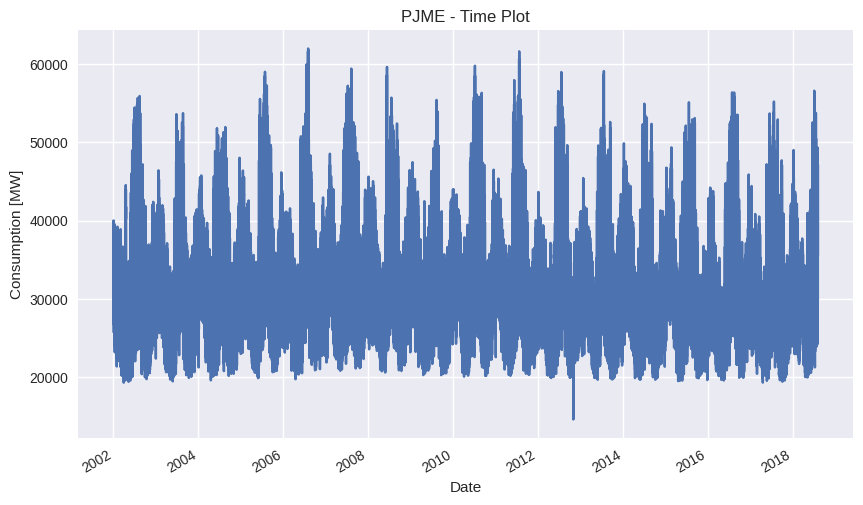

In [8]:
df["PJME_MW"].plot(title="PJME - Time Plot",figsize=(10,6))
plt.ylabel("Consumption [MW]")
plt.xlabel("Date")

***Insights***: 
- in Winter and Summer there is a spike
- There is an anomaly in 2013

## Seasonal Plots

In [9]:
df["year"] = df.index.year
df["month"] = df.index.month
df.reset_index(inplace=True)
df["week"] = df["Datetime"].apply(lambda x:x.week)
df.set_index("Datetime",inplace=True)
df["hour"] = df.index.hour
df["day"] = df.index.day_of_week
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]


In [10]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


Text(0, 0.5, 'Consumption in [MW]')

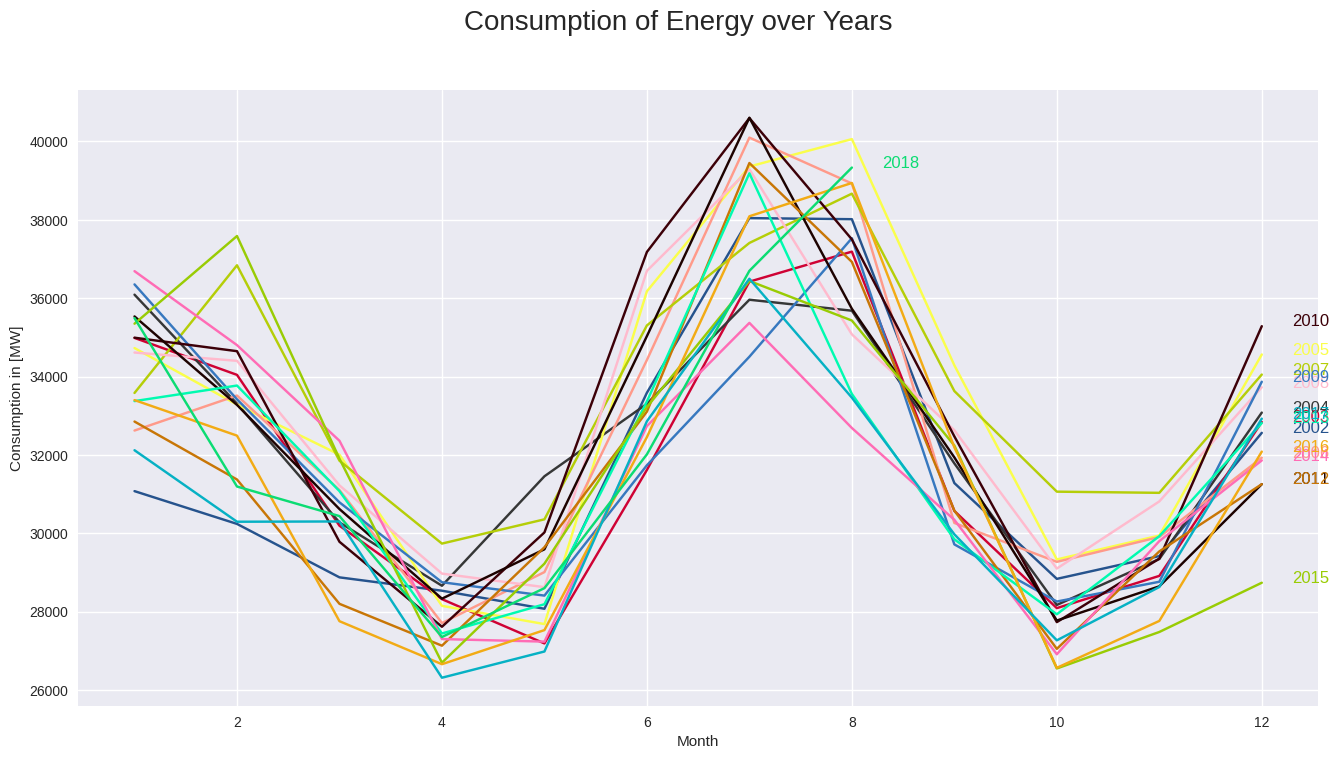

In [11]:
import numpy as np
import matplotlib.colors as mcolors
np.random.seed(42)

df_plot = df[["month", "year", "PJME_MW"]].dropna().groupby(["year","month"]).mean()[["PJME_MW"]].reset_index()
#Plot
plt.figure(figsize=(16,8)).suptitle("Consumption of Energy over Years",fontsize=20)
for year in df_plot["year"].unique()[:]:
    color = np.random.choice(list(mcolors.XKCD_COLORS.keys()))
    sns.lineplot(data=df_plot[df_plot["year"] == year], x = "month", y = "PJME_MW", color = color)
    plt.text(df_plot.loc[df_plot.year==year, :].shape[0]+0.3, df_plot.loc[df_plot.year==year, 'PJME_MW'][-1:].values[0], year, fontsize=12, color=color)
plt.xlabel("Month")
plt.ylabel("Consumption in [MW]")

###### ***Insights***: 
- There is a common pattern in the consumption over years
- There Conumption is high in 6-8 months

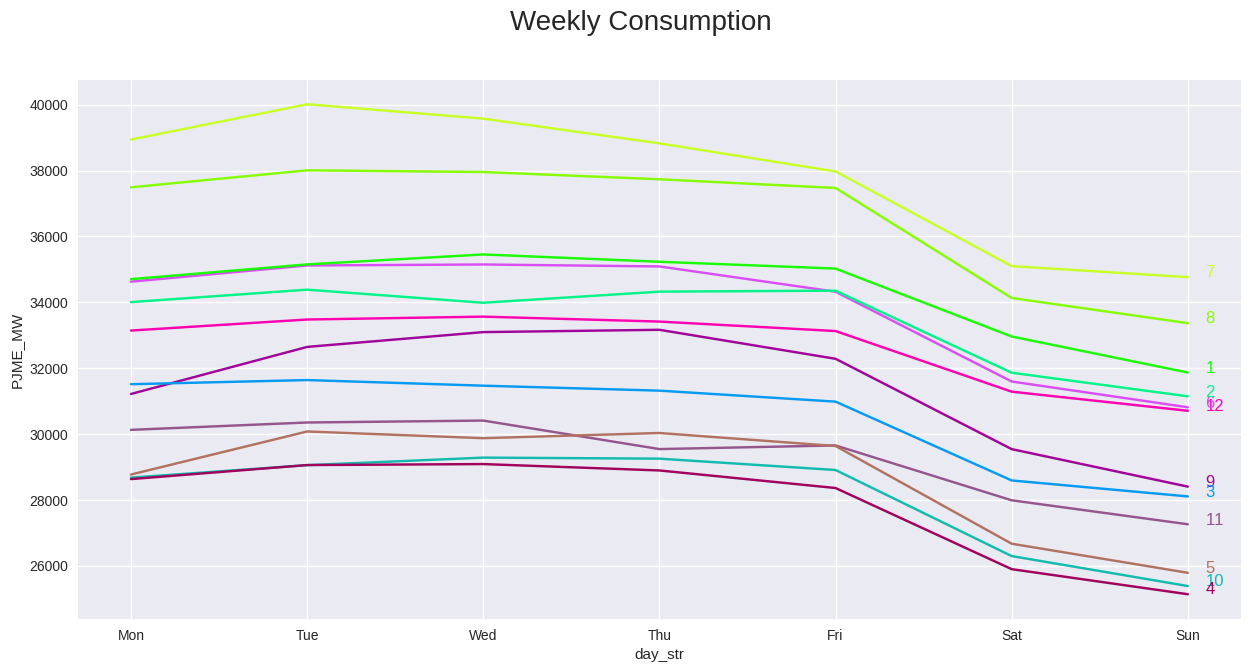

In [12]:
# week day wise ploting
plt.figure(figsize=(15,7)).suptitle("Weekly Consumption", fontsize=20)

df_week_plot = df[["month", "day_str", "day", "PJME_MW"]].dropna().groupby(["day_str","month","day"]).mean()["PJME_MW"].reset_index().sort_values("day")
for month in df_week_plot["month"].unique():
    color = np.random.choice(list(mcolors.XKCD_COLORS.keys()))
    sns.lineplot(data = df_week_plot[df_week_plot["month"] == month], x="day_str", y = "PJME_MW", color=color)
    plt.text(df_week_plot.loc[df_week_plot.month==month, :].shape[0]-.9, df_week_plot.loc[df_week_plot.month==month, 'PJME_MW'][-1:].values[0], month, fontsize=12, color=color)

***Insights***:
- At the weekends the comsuumption is less

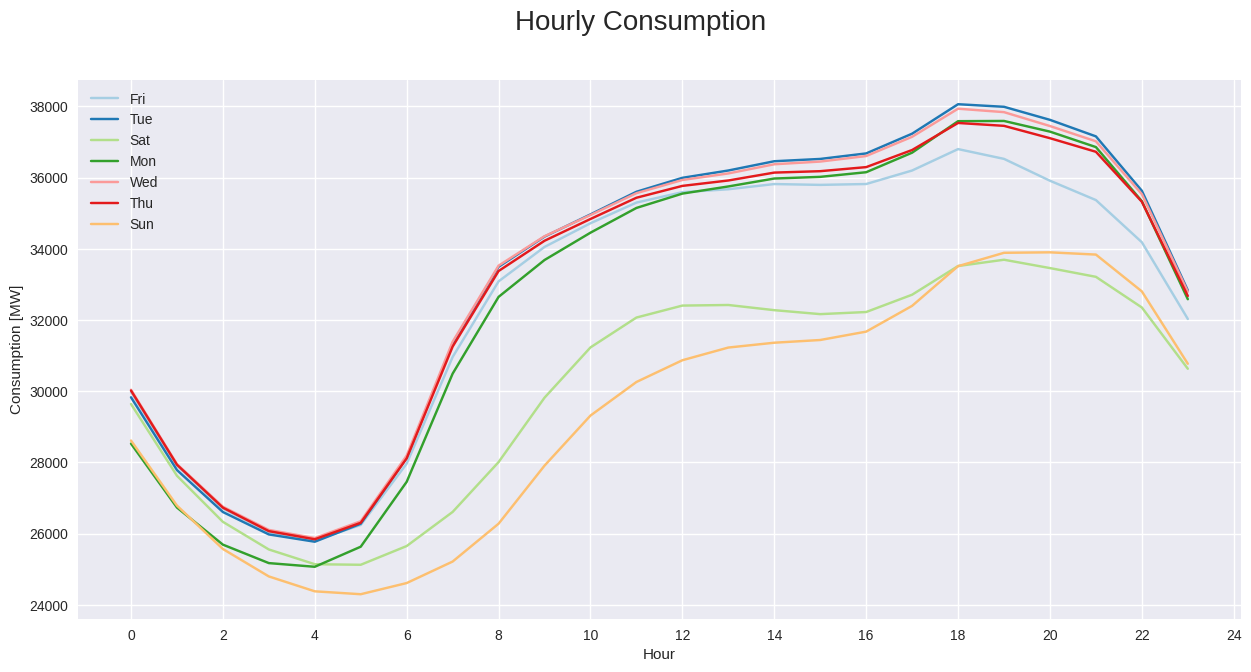

In [13]:
#Daily Consumption

plt.figure(figsize=(15,7)).suptitle("Hourly Consumption", fontsize=20)

df_hourly_plot = df[["PJME_MW", "day_str", "day", "hour"]].dropna().groupby(["day_str","hour"])["PJME_MW"].mean().reset_index().sort_values("hour")

sns.lineplot(data = df_hourly_plot, x = "hour", y="PJME_MW",hue = "day_str", color = color,palette =("Paired"))
plt.locator_params(axis='x', nbins=24)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend()
# df_hourly_plot.head()

***Insights***:
- The Consumption is low in the morning hours 2-6
- The Consumption is low at weekends
- The Consumption is High in nights (17-21)

***Feature Engineering***:
- new_feature = weekend or not
- 

## Box Plots

<Axes: xlabel='PJME_MW'>

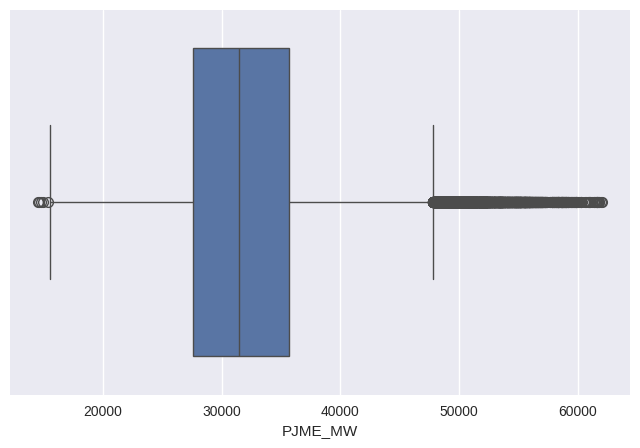

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="PJME_MW")

***Insights***:
- It has skew at right

/tmp/ipykernel_152813/2767865730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_plot, x = "year_month", y="PJME_MW", palette=("rocket"))


Text(0.5, 0, 'Year Month')

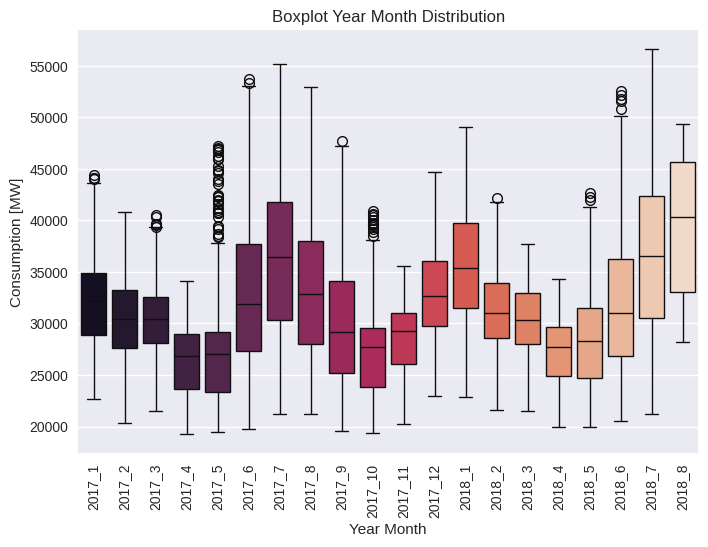

In [15]:
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df_plot = df[df["year"] >= 2017].reset_index().sort_values(by="Datetime").set_index("Datetime")
plt.title(f'Boxplot Year Month Distribution');
plt.xticks(rotation=90)

sns.boxplot(data = df_plot, x = "year_month", y="PJME_MW", palette=("rocket"))
plt.ylabel('Consumption [MW]')
plt.xlabel('Year Month')

***Insights***:
- The Cosumption is dispered in spring and autumn
- The consumption is less uncertain in summer/winter

/tmp/ipykernel_152813/3498746486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x = "day_str", y = "PJME_MW", palette=("Spectral"))


Text(0.5, 0, 'Day of week')

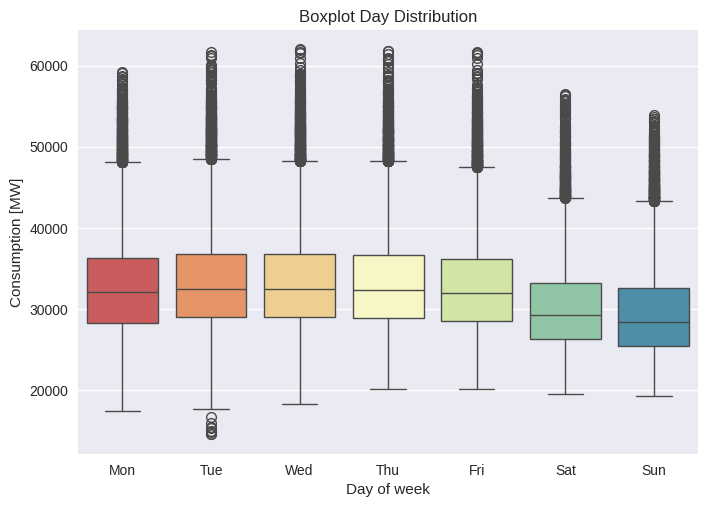

In [16]:
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by="day")

plt.title(f'Boxplot Day Distribution')
sns.boxplot(data=df_plot, x = "day_str", y = "PJME_MW", palette=("Spectral"))
plt.ylabel('Consumption [MW]')
plt.xlabel('Day of week')

***Insights***:
- As seen the weekend has low consumption

/tmp/ipykernel_152813/957630136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot,x="hour", y="PJME_MW", palette=("Spectral"))


<Axes: xlabel='hour', ylabel='PJME_MW'>

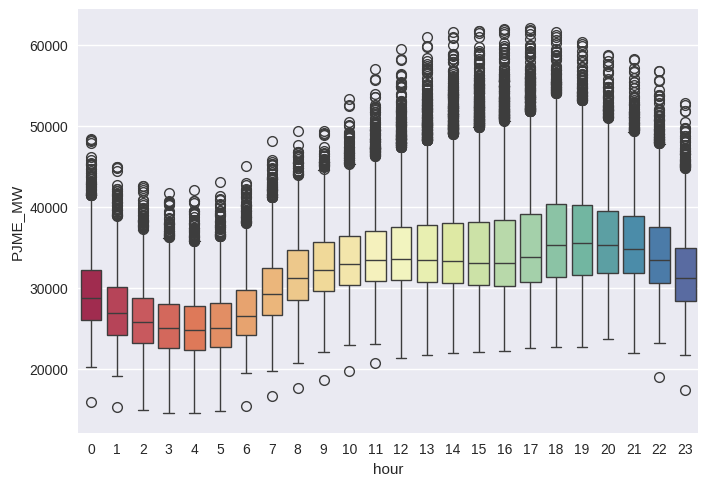

In [17]:
#Hourly distribution
df_plot = df[["hour","PJME_MW"]].sort_values(by="hour")

sns.boxplot(data=df_plot,x="hour", y="PJME_MW", palette=("Spectral"))

***Insights***:
- we can see the M shape we got previously has crushed
- there are lots of outliers
- **Therefore the data does not rely on seasonality**
- there may be climatic feature like temperature and humidity.

## Time Series Decomposition

***Components of timeseries***:
- trend
- seasonality
- remainder(containing anything else in the timeseries)

***Decomposition***:
- additive
- multiplicative

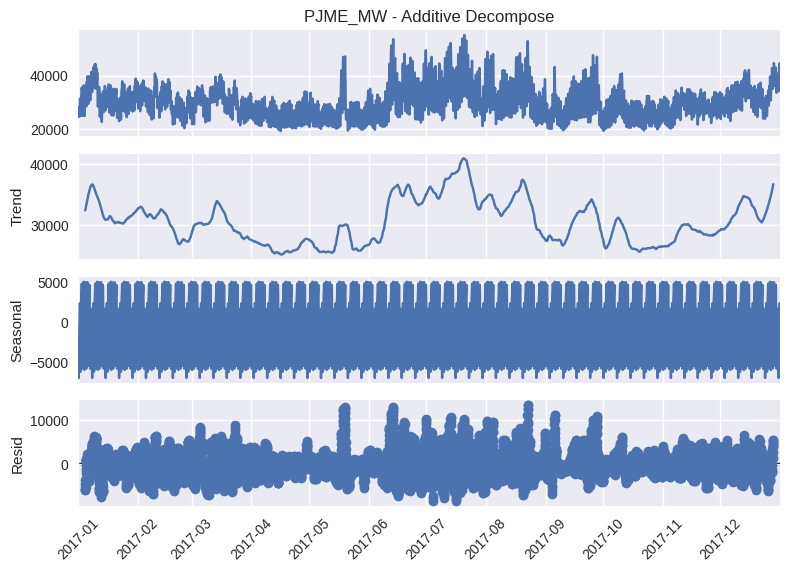

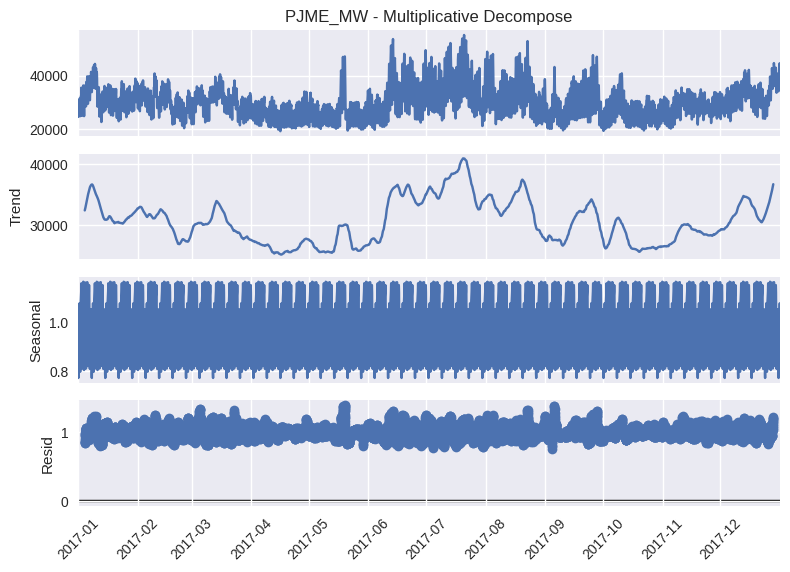

In [21]:
import statsmodels.api as sm
# from statsmodels.tsa.seasonal import seasonal_decompose

df_plot = df[df["year"] == 2017].reset_index()
df_plot = df_plot.drop_duplicates(subset=["Datetime"]).sort_values(by="Datetime").set_index("Datetime")
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

result_add = sm.tsa.seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model="additive", period=24*7)
result_mul = sm.tsa.seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model="multiplicative", period=24*7)


# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

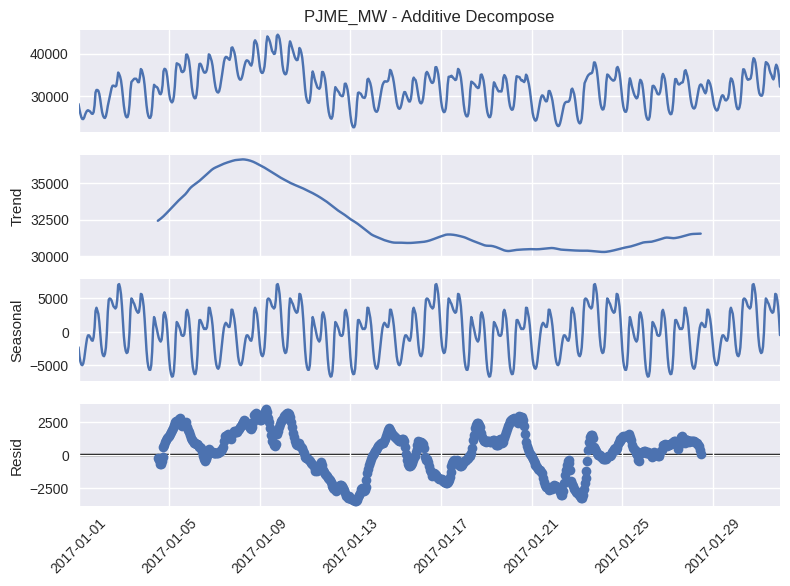

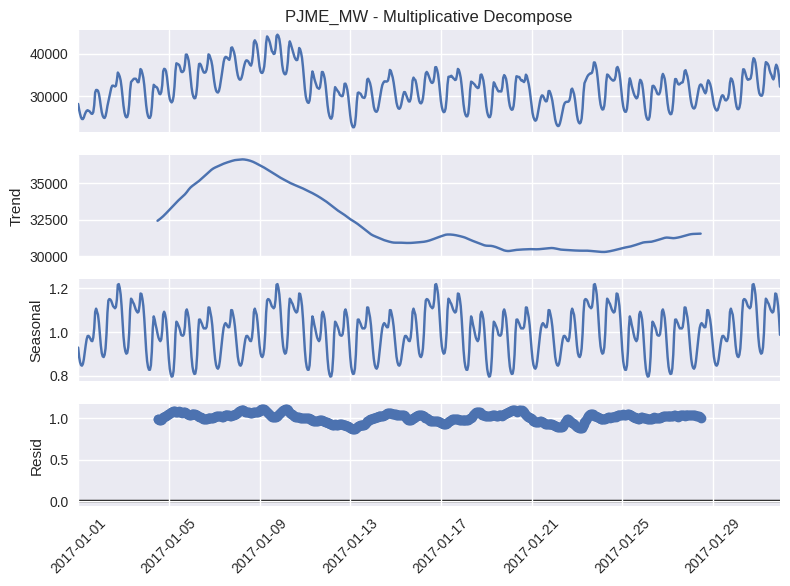

In [24]:
df_plot = df[(df['year'] == 2017)].reset_index()
df_plot = df_plot[df_plot['month'] == 1]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')


result_add = sm.tsa.seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model="additive", period=24*7)
result_mul = sm.tsa.seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model="multiplicative", period=24*7)


# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

In [22]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


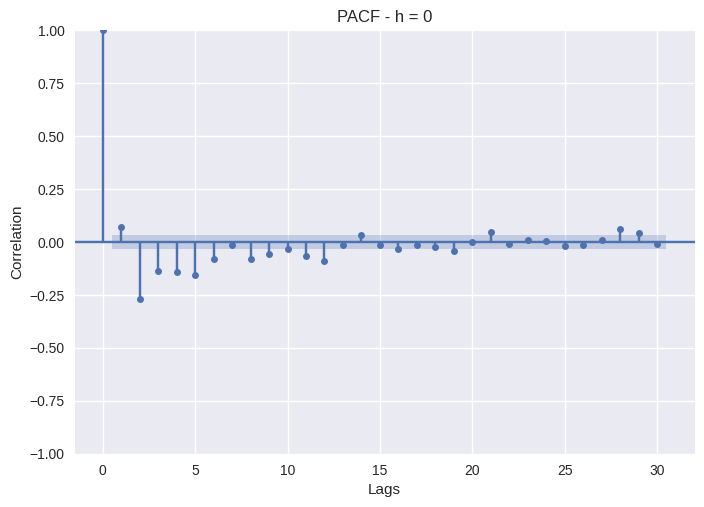

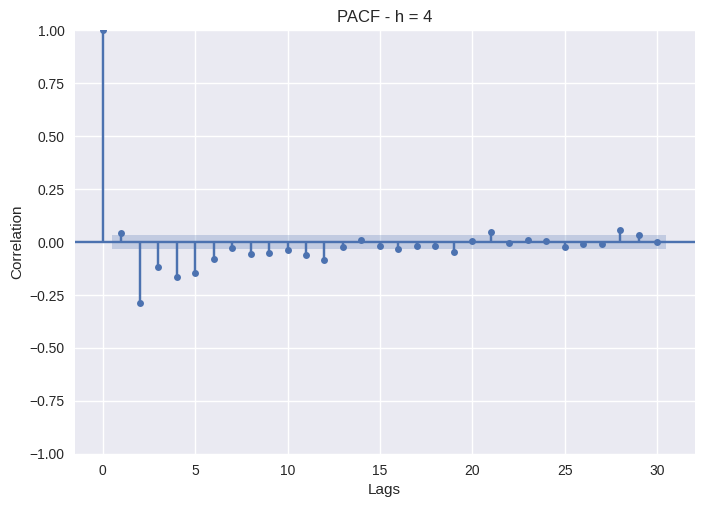

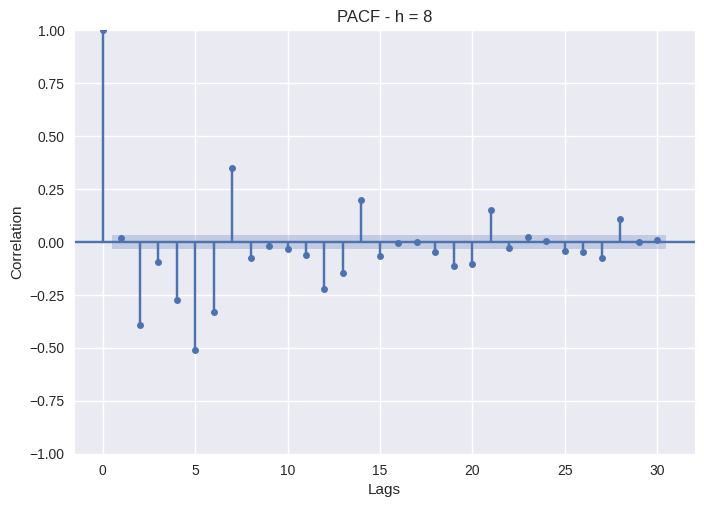

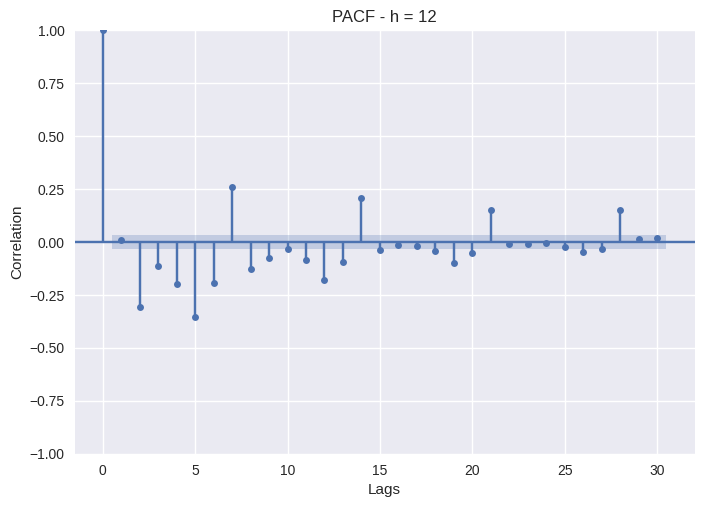

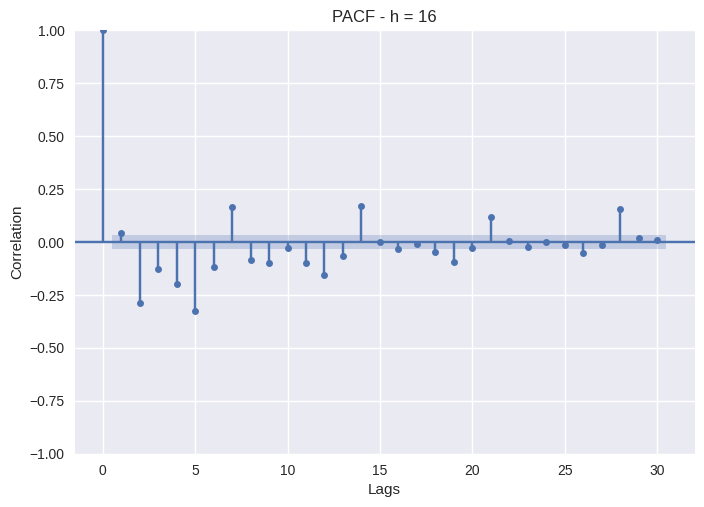

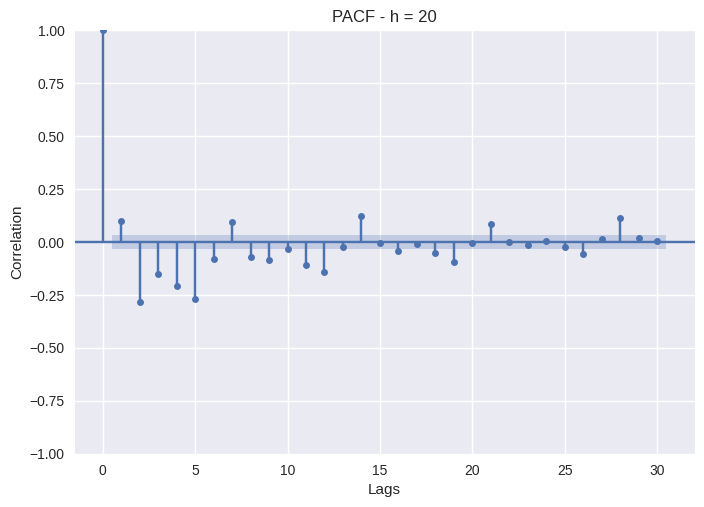

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours = range(0, 24, 4)

for hour in hours:
    plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags=30, alpha=0.01)
    plt.title(f'PACF - h = {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()

***Insights***: